# Analysis of HTTP metrics

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from itertools import product

plt.style.use('ggplot')
import json

In [2]:
# Read csv of http metrics
d = pd.read_csv("Metrics_http.csv", index_col=["platform","workload_size"])
d.drop(inplace=True, columns=["run_id", "rep_id", "workload_type", "startup_time_us","completion_time_us", "running_time_us", "stop_time_us"])
pd.set_option('display.max_colwidth', 200)
d

http_metrics
platform        workload_size                                                                                                                                                                                                         
WASMCLOUD       SMALL          {'RunType': 'HTTP', 'Labels': '', 'StartTime': '2022-07-07T18:34:07.196060088Z', 'RequestedQPS': '250', 'RequestedDuration': '20s', 'ActualQPS': 249.7093254270472, 'ActualDuration': 19991243785, '...
                MEDIUM         {'RunType': 'HTTP', 'Labels': '', 'StartTime': '2022-07-07T18:35:27.52314145Z', 'RequestedQPS': '500', 'RequestedDuration': '20s', 'ActualQPS': 498.7596452089969, 'ActualDuration': 20017657996, 'N...
                LARGE          {'RunType': 'HTTP', 'Labels': '', 'StartTime': '2022-07-07T18:36:48.250628864Z', 'RequestedQPS': '1000', 'RequestedDuration': '20s', 'ActualQPS': 995.9305992417416, 'ActualDuration': 20049589816, ...
VINO            SMALL          {'RunType': 'HTTP', 'Labels': '', 'StartTime': '2022-07-07T18:38:13.022744939Z', 'RequestedQPS': '250', 'RequestedDuration': '20s', 'ActualQPS': 249.86944586739497, 'ActualDuration': 19978433068, ...
                MEDIUM         {'RunType': 'HTTP', 'Labels': '', 'StartTime': '2022-07-07T18:39:32.987015942Z', 'RequestedQPS': '500', 'RequestedDuration': '20s', 'ActualQPS': 499.8135828749658, 'ActualDuration': 19975447531, '...
                LARGE          {'RunType': 'HTTP', 'Labels': '', 'StartTime': '2022-07-07T18:40:53.007956846Z', 'RequestedQPS': '1000', 'RequestedDuration': '20s', 'ActualQPS': 999.4639996399627, 'ActualDuration': 19978708595, ...
WASMEDGE_ON_K8S SMALL          {'RunType': 'HTTP', 'Labels': '', 'StartTime': '2022-07-07T18:54:08.172402515Z', 'RequestedQPS': '250', 'RequestedDuration': '20s', 'ActualQPS': 249.88046380854698, 'ActualDuration': 19977552162, ...
                MEDIUM         {'RunType': 'HTTP', 'Labels': '', 'StartTime': '2022-07-07T18:55:08.181177381Z', 'RequestedQPS': '500', 'RequestedDuration': '20s', 'ActualQPS': 499.5341183154464, 'ActualDuration': 19986622803, '...
                LARGE          {'RunType': 'HTTP', 'Labels': '', 'StartTime': '2022-07-07T18:56:48.307335652Z', 'RequestedQPS': '1000', 'RequestedDuration': '20s', 'ActualQPS': 998.209826204692, 'ActualDuration': 20003810297, '...

# Response time

In [3]:
#filter to histogram
def get_hist(str):
    json_string = str.replace("\'", "\"").replace("None","null").replace("False","false").replace("True","true") #unpythonify json
    j_dict = json.loads(json_string)
    return j_dict["DurationHistogram"]["Data"]

d_hist = d.applymap(lambda x: get_hist(x))
d_hist

http_metrics
platform        workload_size                                                                                                                                                                                                         
WASMCLOUD       SMALL          [{'Start': 0.001604318, 'End': 0.002, 'Percent': 0.40064102564102566, 'Count': 20}, {'Start': 0.002, 'End': 0.003, 'Percent': 3.605769230769231, 'Count': 160}, {'Start': 0.003, 'End': 0.004, 'Perc...
                MEDIUM         [{'Start': 0.001885451, 'End': 0.002, 'Percent': 0.010016025641025642, 'Count': 1}, {'Start': 0.002, 'End': 0.003, 'Percent': 0.5408653846153846, 'Count': 53}, {'Start': 0.003, 'End': 0.004, 'Perc...
                LARGE          [{'Start': 0.003322314, 'End': 0.004, 'Percent': 0.05008012820512821, 'Count': 10}, {'Start': 0.004, 'End': 0.005, 'Percent': 0.4156650641025641, 'Count': 73}, {'Start': 0.005, 'End': 0.006, 'Perc...
VINO            SMALL          [{'Start': 0.000339134, 'End': 0.001, 'Percent': 15.184294871794872, 'Count': 758}, {'Start': 0.001, 'End': 0.002, 'Percent': 72.07532051282051, 'Count': 2840}, {'Start': 0.002, 'End': 0.003, 'Per...
                MEDIUM         [{'Start': 0.000346032, 'End': 0.001, 'Percent': 4.377003205128205, 'Count': 437}, {'Start': 0.001, 'End': 0.002, 'Percent': 21.814903846153847, 'Count': 1741}, {'Start': 0.002, 'End': 0.003, 'Per...
                LARGE          [{'Start': 0.000455278, 'End': 0.001, 'Percent': 1.5725160256410255, 'Count': 314}, {'Start': 0.001, 'End': 0.002, 'Percent': 6.610576923076923, 'Count': 1006}, {'Start': 0.002, 'End': 0.003, 'Per...
WASMEDGE_ON_K8S SMALL          [{'Start': 0.000499816, 'End': 0.001, 'Percent': 2.483974358974359, 'Count': 124}, {'Start': 0.001, 'End': 0.002, 'Percent': 14.903846153846153, 'Count': 620}, {'Start': 0.002, 'End': 0.003, 'Perc...
                MEDIUM         [{'Start': 0.000583394, 'End': 0.001, 'Percent': 0.6911057692307693, 'Count': 69}, {'Start': 0.001, 'End': 0.002, 'Percent': 5.548878205128205, 'Count': 485}, {'Start': 0.002, 'End': 0.003, 'Perce...
                LARGE          [{'Start': 0.000635163, 'End': 0.001, 'Percent': 0.1452323717948718, 'Count': 29}, {'Start': 0.001, 'End': 0.002, 'Percent': 1.342147435897436, 'Count': 239}, {'Start': 0.002, 'End': 0.003, 'Perce...

In [4]:
#split json into separate columns
dx = d_hist.explode("http_metrics")
dx["Millis"] = dx["http_metrics"].apply(lambda x: x["Start"]*1000)
dx["Percent"] = dx["http_metrics"].apply(lambda x: x["Percent"])
dx.drop(inplace=True, columns="http_metrics")
dx.set_index(["Millis"], append=True, inplace=True)
dx

Percent
platform        workload_size Millis               
WASMCLOUD       SMALL         1.604318     0.400641
                              2.000000     3.605769
                              3.000000     7.632212
                              4.000000    12.279647
                              5.000000    17.487981
...                                             ...
WASMEDGE_ON_K8S LARGE         30.000000   91.676683
                              35.000000   97.460938
                              40.000000   99.489183
                              45.000000   99.914864
                              50.000000  100.000000

[170 rows x 1 columns]

## Response time distributions by workload

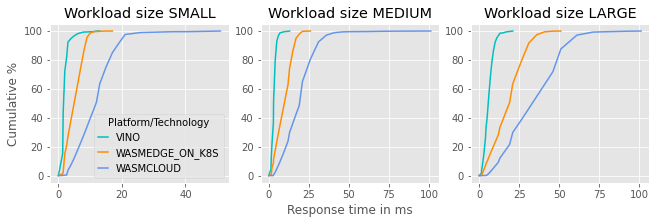

In [5]:
sizes = ["SMALL", "MEDIUM", "LARGE"]

fig, axs = plt.subplots(1, len(sizes), figsize=(9,3), constrained_layout=True)

for count, size in enumerate(sizes):
    unstacked = dx.loc[(slice(None), size, slice(None))]["Percent"].unstack("platform")[["VINO", "WASMEDGE_ON_K8S", "WASMCLOUD"]]
    unstacked.loc[-1] = [0,0,0] # Add zero entry
    unstacked.index = unstacked.index + 1
    unstacked = unstacked.sort_index().interpolate(limit_area="inside")
    ax = unstacked.plot(ax=axs.flatten()[count], color=["c", "darkorange", "cornflowerblue"])
    ax.set(xlabel="", title=f"Workload size {size}")
    ax.legend(title="Platform/Technology", handlelength=1)
    
axs[0].set(ylabel="Cumulative %")
axs[1].legend().remove()
axs[2].legend().remove()
axs[1].set(xlabel="Response time in ms")
plt.savefig("images/http_response.svg")

### Percentiles

In [6]:
def get_perc(str):
    json_string = str.replace("\'", "\"").replace("None","null").replace("False","false").replace("True","true") #unpythonify json
    j_dict = json.loads(json_string)
    return j_dict["DurationHistogram"]["Percentiles"]

d_perc = d.applymap(lambda x: get_perc(x))
d_perc

http_metrics
platform        workload_size                                                                                                                                                                                                         
WASMCLOUD       SMALL          [{'Percentile': 10, 'Value': 0.004509482758620689}, {'Percentile': 20, 'Value': 0.006478625954198474}, {'Percentile': 25, 'Value': 0.007423220973782772}, {'Percentile': 30, 'Value': 0.008335438596...
                MEDIUM         [{'Percentile': 10, 'Value': 0.00713955223880597}, {'Percentile': 20, 'Value': 0.010712162162162163}, {'Percentile': 25, 'Value': 0.01239870340356564}, {'Percentile': 30, 'Value': 0.01401677419354...
                LARGE          [{'Percentile': 10, 'Value': 0.01253240418118467}, {'Percentile': 20, 'Value': 0.019056591639871386}, {'Percentile': 25, 'Value': 0.02210196779964222}, {'Percentile': 30, 'Value': 0.02508153180975...
VINO            SMALL          [{'Percentile': 10, 'Value': 0.0007740658906208719}, {'Percentile': 20, 'Value': 0.0010846478873239437}, {'Percentile': 25, 'Value': 0.0011725352112676056}, {'Percentile': 30, 'Value': 0.001260422...
                MEDIUM         [{'Percentile': 10, 'Value': 0.0013224583572659392}, {'Percentile': 20, 'Value': 0.0018959218839747272}, {'Percentile': 25, 'Value': 0.002109504132231405}, {'Percentile': 30, 'Value': 0.0022814049...
                LARGE          [{'Percentile': 10, 'Value': 0.0023997637330183106}, {'Percentile': 20, 'Value': 0.003435241899689303}, {'Percentile': 25, 'Value': 0.0038783843763870395}, {'Percentile': 30, 'Value': 0.0042677014...
WASMEDGE_ON_K8S SMALL          [{'Percentile': 10, 'Value': 0.0016051612903225808}, {'Percentile': 20, 'Value': 0.002415686274509804}, {'Percentile': 25, 'Value': 0.0028235294117647056}, {'Percentile': 30, 'Value': 0.0032404074...
                MEDIUM         [{'Percentile': 10, 'Value': 0.0027431438127090303}, {'Percentile': 20, 'Value': 0.004437479270315092}, {'Percentile': 25, 'Value': 0.005282685512367491}, {'Percentile': 30, 'Value': 0.00616124567...
                LARGE          [{'Percentile': 10, 'Value': 0.005108960573476703}, {'Percentile': 20, 'Value': 0.008839688715953309}, {'Percentile': 25, 'Value': 0.010748582230623818}, {'Percentile': 30, 'Value': 0.012697098646...

In [7]:
dx2 = d_perc.explode("http_metrics")
dx2["Percentile"] = dx2["http_metrics"].apply(lambda x: x["Percentile"])
dx2["Millis"] = dx2["http_metrics"].apply(lambda x: x["Value"] * 1000)
dx2.drop(inplace=True, columns="http_metrics")
dx2.set_index(["Percentile"], append=True, inplace=True)
dx2.loc[(slice(None), slice(None), [25, 50, 75, 90, 95])].unstack()

Millis                                   \
Percentile                          25.0       50.0       75.0       90.0   
platform        workload_size                                               
VINO            LARGE           3.878384   5.695472   7.651936   9.592778   
                MEDIUM          2.109504   2.969008   3.848378   4.789061   
                SMALL           1.172535   1.611972   2.144411   2.885064   
WASMCLOUD       LARGE          22.101968  37.138216  52.000000  62.490566   
                MEDIUM         12.398703  20.450423  28.188546  33.956816   
                SMALL           7.423221  11.834459  15.972650  19.529630   
WASMEDGE_ON_K8S LARGE          10.748582  19.844504  28.923898  34.381146   
                MEDIUM          5.282686   9.688057  14.099914  16.885746   
                SMALL           2.823529   4.933898   7.049828   8.408768   

                                          
Percentile                          95.0  
platform        workload_size             
VINO            LARGE          10.951618  
                MEDIUM          5.546803  
                SMALL           4.049438  
WASMCLOUD       LARGE          67.723270  
                MEDIUM         37.666667  
                SMALL          22.851974  
WASMEDGE_ON_K8S LARGE          37.872727  
                MEDIUM         18.019244  
                SMALL           8.929854

# Throughput

In [8]:
d_throughput = pd.read_csv("Metrics_http_max_throughput.csv", index_col=["platform"])
d_throughput.drop(inplace=True, columns=["workload_size", "run_id", "rep_id", "workload_type", "startup_time_us","completion_time_us", "running_time_us", "stop_time_us"])
pd.set_option('display.max_colwidth', 200)

def get_thr(str):
    json_string = str.replace("\'", "\"").replace("None","null").replace("False","false").replace("True","true") #unpythonify json
    j_dict = json.loads(json_string)
    return j_dict["ActualQPS"]

d_throughput = d_throughput.applymap(lambda x: get_thr(x))
d_throughput.groupby("platform").describe()

http_metrics                                          \
                       count          mean         std           min   
platform                                                               
VINO                     3.0  16511.059970  449.458368  16190.164964   
WASMCLOUD                3.0   1858.033240   26.566313   1828.254429   
WASMEDGE_ON_K8S          3.0   2221.103608  640.862614   1490.753333   

                                                                         
                          25%           50%           75%           max  
platform                                                                 
VINO             16254.213301  16318.261637  16671.507473  17024.753310  
WASMCLOUD         1847.399266   1866.544104   1872.922646   1879.301187  
WASMEDGE_ON_K8S   1986.925713   2483.098093   2586.278746   2689.459399